Solucion de la Tarea 1 de estadistica 3

In [ ]:
# Importamos las librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import random
import math
import numpy as np
from scipy.spatial import distance as ssd
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import os
from PIL import Image
from scipy import stats











#Cargamos el archivo
df = pd.read_csv('punto_1.csv') 
print (df)

df = df.drop(columns=['City','Initial label', 'training'])

In [4]:
## Calcular la media
media = df.mean()
media

GDP (USD Billion)         8.750000
Population (Millions)     0.731000
Unemployment rate (%)    13.833333
Average age              29.233333
Women (%)                51.500000
Men (%)                  48.500000
Budget (USD Billion)      1.650000
dtype: float64

In [5]:
#Calcular la mediana
mediana = df.median()
mediana

GDP (USD Billion)         2.65
Population (Millions)     0.39
Unemployment rate (%)    13.45
Average age              29.00
Women (%)                51.00
Men (%)                  49.00
Budget (USD Billion)      0.60
dtype: float64

In [6]:
#Calcular la desviación estándar
desviacionEstandar = df.std()
desviacionEstandar

GDP (USD Billion)        19.914433
Population (Millions)     1.352832
Unemployment rate (%)     2.945052
Average age               2.238893
Women (%)                 0.776819
Men (%)                   0.776819
Budget (USD Billion)      3.451187
dtype: float64

In [8]:
#Calculas las Repeticiones de la Moda

#Función para calcular las repeticiones de la moda
def calcularRepModa(columna):
    return columna.value_counts()

RepModa = df.apply(calcularRepModa).max()
RepModa

GDP (USD Billion)         1.0
Population (Millions)     2.0
Unemployment rate (%)     1.0
Average age               6.0
Women (%)                14.0
Men (%)                  14.0
Budget (USD Billion)      3.0
dtype: float64

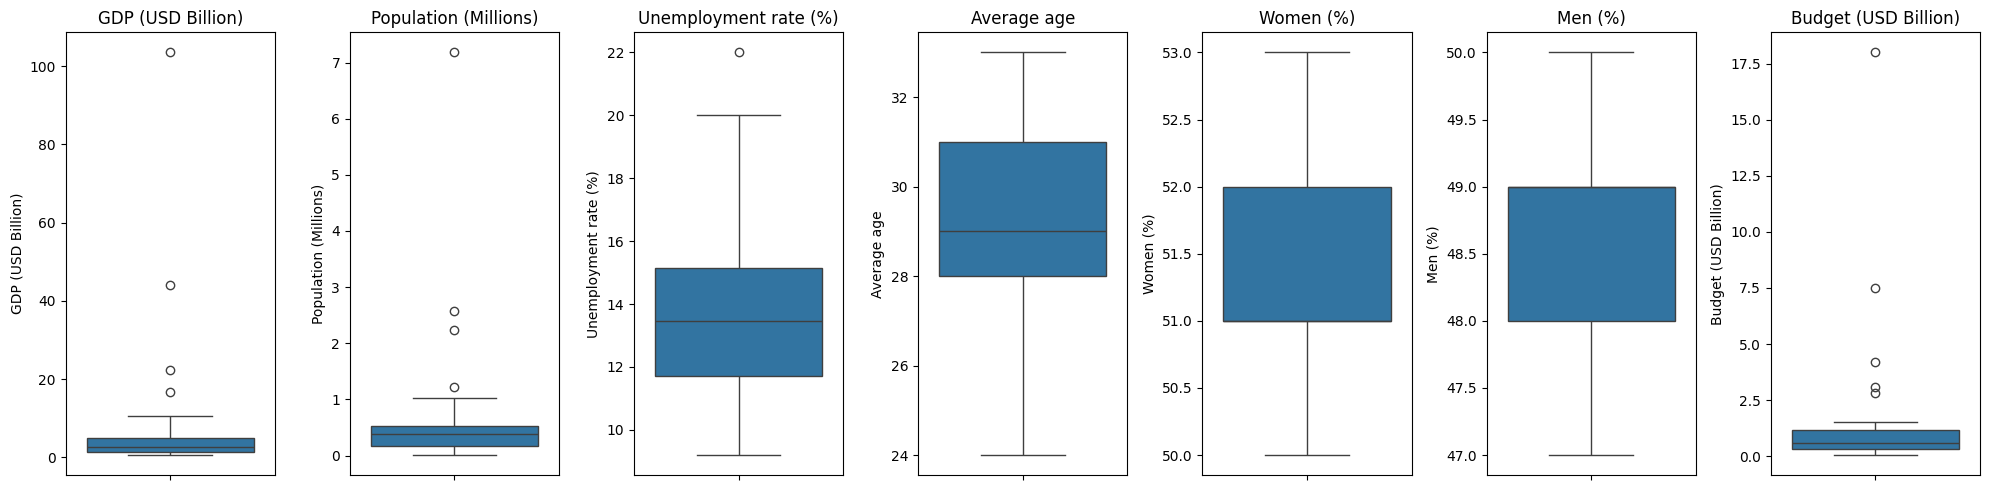

In [9]:
#graficar los bloxplots
fig, axs = plt.subplots(1, len(df.columns), figsize=(20,5))
for i, column in enumerate(df.columns):
    sns.boxplot(y=df[column], ax=axs[i])
    axs[i].set_title(column)
plt.tight_layout()
plt.show()

In [10]:
# Calcula la matriz de covarianza
cov_matrix = df.cov()
cov_matrix

GDP (USD Billion)  Population (Millions)  \
GDP (USD Billion)             396.584655              26.685224   
Population (Millions)          26.685224               1.830154   
Unemployment rate (%)         -19.123103              -1.342793   
Average age                    15.087931               1.104931   
Women (%)                       4.243103               0.279138   
Men (%)                        -4.243103              -0.279138   
Budget (USD Billion)           68.613448               4.639603   

                       Unemployment rate (%)  Average age  Women (%)  \
GDP (USD Billion)                 -19.123103    15.087931   4.243103   
Population (Millions)              -1.342793     1.104931   0.279138   
Unemployment rate (%)               8.673333    -5.232184  -0.993103   
Average age                        -5.232184     5.012644   1.224138   
Women (%)                          -0.993103     1.224138   0.603448   
Men (%)                             0.993103    -1.224138  -0.603448   
Budget (USD Billion)               -3.481379     2.762069   0.734483   

                        Men (%)  Budget (USD Billion)  
GDP (USD Billion)     -4.243103             68.613448  
Population (Millions) -0.279138              4.639603  
Unemployment rate (%)  0.993103             -3.481379  
Average age           -1.224138              2.762069  
Women (%)             -0.603448              0.734483  
Men (%)                0.603448             -0.734483  
Budget (USD Billion)  -0.734483             11.910690

In [11]:
# Ejemplo: covarianza entre 'Columna1' y 'Columna2'
cov_col1_col2 = cov_matrix.loc['Population (Millions)', 'Average age']
print(f'Covarianza entre Columna1 y Columna2: {cov_col1_col2}')

Covarianza entre Columna1 y Columna2: 1.1049310344827585


Cuando calculamos la podemos notar por ejemplo que entre Population y Average age es positiva, es decir, a medida que crece una la otra también aumenta, como tal el gráfico anterior me muestra la matriz de covarancia que hay entre cada columna del set de datos(omitiendo city), pero también podemos aprovecharnos de que python nos permite visualizar la covarancia entre dos columnas rápidamente

In [12]:
#Calcular la correlación
correlacion = df.corr()
correlacion

GDP (USD Billion)  Population (Millions)  \
GDP (USD Billion)               1.000000               0.990510   
Population (Millions)           0.990510               1.000000   
Unemployment rate (%)          -0.326060              -0.337033   
Average age                     0.338398               0.364803   
Women (%)                       0.274281               0.265616   
Men (%)                        -0.274281              -0.265616   
Budget (USD Billion)            0.998327               0.993730   

                       Unemployment rate (%)  Average age  Women (%)  \
GDP (USD Billion)                  -0.326060     0.338398   0.274281   
Population (Millions)              -0.337033     0.364803   0.265616   
Unemployment rate (%)               1.000000    -0.793518  -0.434092   
Average age                        -0.793518     1.000000   0.703845   
Women (%)                          -0.434092     0.703845   1.000000   
Men (%)                             0.434092    -0.703845  -1.000000   
Budget (USD Billion)               -0.342523     0.357464   0.273964   

                        Men (%)  Budget (USD Billion)  
GDP (USD Billion)     -0.274281              0.998327  
Population (Millions) -0.265616              0.993730  
Unemployment rate (%)  0.434092             -0.342523  
Average age           -0.703845              0.357464  
Women (%)             -1.000000              0.273964  
Men (%)                1.000000             -0.273964  
Budget (USD Billion)  -0.273964              1.000000

In [13]:
#ejemplo correlacion entre variables
correlacionEntreVariables = df['Population (Millions)'].corr(df['Average age'])
print(correlacionEntreVariables)

0.36480259652143776


**explicacion** **entre** **covarianza** **y** **correlacion**  la covarianza nos da una pista sobre la dirección del cambio conjunto, mientras que la correlación nos da una imagen más clara y comparativa de qué tan fuerte y en qué sentido están relacionadas las variables.









In [3]:
import csv
import math

# Número de clusters
clusters = 4
centroids = {}
it = 0

# Leer las ciudades desde el archivo CSV
k_cities = []
with open('punto_1.csv', 'r', newline='', encoding='utf-8') as file:
    reader = csv.reader(file)
    k_cities = [row for row in reader]

label_col = k_cities[0].index('Initial label')

# Normalización de datos
def normalize(data):
    num_cols = len(data[0])
    means = [0] * num_cols
    stds = [0] * num_cols

    for c in range(num_cols):
        try:
            col_values = [float(row[c]) for row in data if row[c].replace('.', '', 1).isdigit()]
            means[c] = sum(col_values) / len(col_values)
            stds[c] = (sum((x - means[c]) ** 2 for x in col_values) / (len(col_values)-1)) ** 0.5
        except:
            continue

    for row in data:
        for c in range(num_cols):
            try:
                if stds[c] != 0 and c != label_col:
                    row[c] = (float(row[c]) - means[c]) / stds[c]
            except:
                continue

    return data

k_cities = normalize(k_cities[1:])

# Dividir entre ciudades de entrenamiento y test
train_cities = [row[:-1] for row in k_cities if row[-1] == "Yes"]
test_cities = [row[:-1] for row in k_cities if row[-1] == "No"]

# Calcular distancia euclidiana
def get_distance(a,b):
    d = 0
    for i in range(len(b)):
        if i == label_col: continue
        try:
            d += (float(b[i]) - float(a[i]))**2
        except:
            continue
    return math.sqrt(d)

# Calcular centroides
def get_centroid(data):
    centroid = [0] * len(data[0])
    for row in data:
        for col in range(len(row)):
            if col == label_col: continue
            try:
                centroid[col] += float(row[col])/len(data)
            except:
                continue
    return centroid

# Reasignar etiqueta al cluster más cercano
def reassign_label(city):
    distances = {}
    swap = False
    for c in centroids:
        distances[c] = get_distance(centroids[c], city)

    closest_cluster = str(min(distances, key=distances.get))
    if city[-1] != closest_cluster:
        city[-1] = closest_cluster
        swap = True
    return swap

# Recalcular centroides
def calculate_centroids():
    for k in range(clusters):
        filtered = [row for row in train_cities if row[-1] == str(k)]
        centroids[k] = get_centroid(filtered)

# Entrenamiento del modelo
for i in range(len(k_cities)):
    it += 1
    calculate_centroids()
    swap = False
    for city in train_cities:
        s = reassign_label(city)
        if s: swap = s
    if not swap:
        calculate_centroids()
        break

print("Iteraciones:", it)

# Generar el archivo de resultados solo con ciudades de prueba y su ciudad más cercana
output = [['ID', 'label']]

for city in test_cities:
    d0 = {}
    for c in centroids:
        d0[c] = get_distance(centroids[c], city)

    closest_cluster = min(d0, key=d0.get)
    
    # Encontrar la ciudad más cercana dentro del cluster más cercano
    d1 = {}
    for t in train_cities:
        d1[t[0]] = get_distance(centroids[closest_cluster], t)

    closest_city = min(d1, key=d1.get)
    output.append([city[0], closest_city])

with open('k_means_migueljaramillo.csv', 'w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    for row in output:
        writer.writerow(row)



Iteraciones: 3


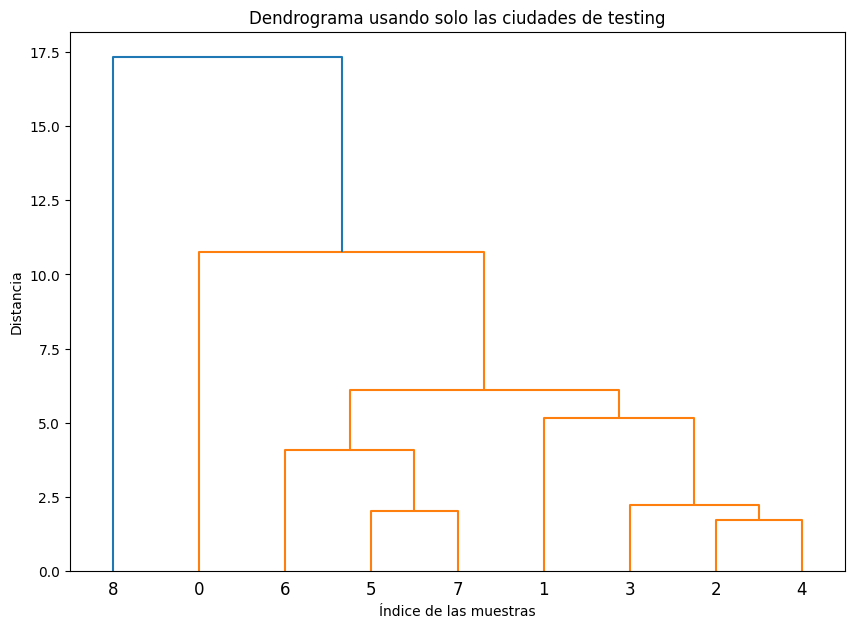

In [16]:
# Cargar el archivo CSV
test_df = pd.read_excel('test.xlsx')

# Convertir DataFrame a numpy array
data = test_df.iloc[:, 1:-2].values 

# Calcular la matriz de distancias
distance_matrix = ssd.pdist(data, metric='euclidean')

# Realizar el clustering jerárquico utilizando enlace completo
linkage_matrix = sch.linkage(distance_matrix, method='complete')

# Crear y visualizar el dendrograma
plt.figure(figsize=(10, 7))
sch.dendrogram(linkage_matrix)
plt.title('Dendrograma usando solo las ciudades de testing')
plt.xlabel('Índice de las muestras')
plt.ylabel('Distancia')
plt.show()

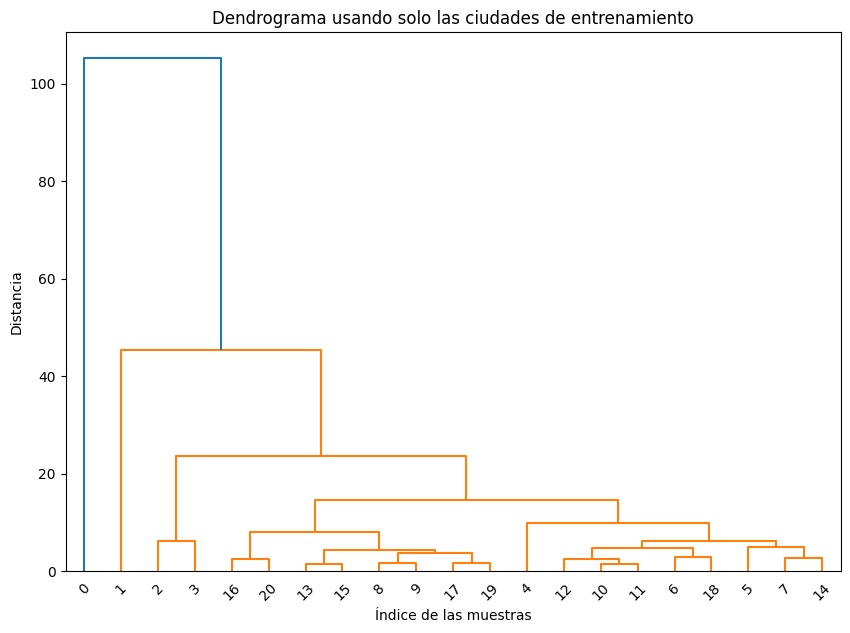

In [17]:
# Cargar el archivo CSV
test_df = pd.read_excel('train.xlsx')

# Convertir DataFrame a numpy array
data = test_df.iloc[:, 1:-1].values 

# Calcular la matriz de distancias
distance_matrix = ssd.pdist(data, metric='euclidean')

# Realizar el clustering jerárquico utilizando enlace completo
linkage_matrix = sch.linkage(distance_matrix, method='complete')

# Crear y visualizar el dendrograma
plt.figure(figsize=(10, 7))
sch.dendrogram(linkage_matrix)
plt.title('Dendrograma usando solo las ciudades de entrenamiento')
plt.xlabel('Índice de las muestras')
plt.ylabel('Distancia')
plt.show()

In [ ]:
# Cargar el archivo CSV
test_df = pd.read_csv('punto_1.csv') 

# Convertir DataFrame a numpy array
data = test_df.iloc[:, 1:-2].values 

# Calcular la matriz de distancias
distance_matrix = ssd.pdist(data, metric='euclidean')

# Realizar el clustering jerárquico utilizando enlace completo
linkage_matrix = sch.linkage(distance_matrix, method='complete')

# Crear y visualizar el dendrograma
plt.figure(figsize=(10, 7))
sch.dendrogram(linkage_matrix)
plt.title('Dendrograma usando todas las ciudades')
plt.xlabel('Índice de las muestras')
plt.ylabel('Distancia')
plt.show()

In [47]:
# inicio Punto 2

# Seleccionamos las dos variables que plantea el ejercicio
datos_seleccionados = df[['GDP (USD Billion)', 'Population (Millions)']]

# Normalización de los datos
escalador = StandardScaler()
datos_normalizados = escalador.fit_transform(datos_seleccionados)

# Aplicamos PCA para reducir la dimensionalidad a una sola dimensión
pca = PCA(n_components=1)
datos_reducidos = pca.fit_transform(datos_normalizados)
print(datos_reducidos)

[[ 6.8502549 ]
 [ 2.25429149]
 [ 1.28986071]
 [ 0.55599905]
 [ 0.22215487]
 [-0.13264057]
 [-0.22552843]
 [-0.1164    ]
 [-0.2495073 ]
 [-0.28371492]
 [-0.33878374]
 [-0.31240449]
 [-0.34981985]
 [-0.33577783]
 [-0.35363312]
 [-0.42826202]
 [-0.4461173 ]
 [-0.46928881]
 [-0.48353267]
 [-0.50670418]
 [-0.53689669]
 [-0.53348711]
 [-0.58855592]
 [-0.61874844]
 [-0.58514634]
 [-0.64191995]
 [-0.62958272]
 [-0.65445902]
 [-0.6740191 ]
 [-0.67763052]]


In [48]:
#matriz de covarianza
cov = datos_seleccionados.cov()
cov

GDP (USD Billion)  Population (Millions)
GDP (USD Billion)             396.584655              26.685224
Population (Millions)          26.685224               1.830154

In [49]:
# eigenvalues
cov_array = cov.values
eigenvalores, eigenvectores = np.linalg.eig(cov_array)
print(eigenvalores)

[3.98380395e+02 3.44139937e-02]


Valor Alto (3.98379741e+02): Es como si esta dirección en los datos fuera el camino principal que sigue la mayor parte de la información. Imagina que tienes un montón de puntos y esta línea pasa justo por donde más puntos se agrupan. Es la dirección más importante porque explica la mayor parte de las diferencias entre los datos.
Valor Bajo (3.43495160e-02): Esta dirección casi no aporta información nueva. Es como un camino secundario donde casi no hay puntos, así que no influye mucho para entender cómo están distribuidos los datos.

In [50]:
# Varianza total
varianza_total = np.sum(eigenvalores)

# Varianza explicada por cada componente
varianza_explicada = eigenvalores / varianza_total

print("Varianza total:", varianza_total)
print("Varianza explicada por cada componente:")
print(varianza_explicada)

Varianza total: 398.4148093103449
Varianza explicada por cada componente:
[9.99913623e-01 8.63772954e-05]


In [51]:
print(eigenvectores)

[[ 0.99774346 -0.06714158]
 [ 0.06714158  0.99774346]]


In [52]:
# Calcular la matriz proyectada
matriz_proyectada = np.dot(datos_normalizados, eigenvectores)

# Mostrar la matriz proyectada
print("Matriz proyectada:")
print(matriz_proyectada)

Matriz proyectada:
[[ 5.15381062  4.51267902]
 [ 1.89419666  1.25826945]
 [ 0.77124478  1.0776375 ]
 [ 0.43540102  0.34671042]
 [ 0.10426971  0.21828795]
 [-0.08151144 -0.10829742]
 [-0.14261314 -0.17953839]
 [-0.1845329   0.03427014]
 [-0.21143043 -0.13723108]
 [-0.25270164 -0.14198907]
 [-0.26743634 -0.20881496]
 [-0.27919023 -0.15527711]
 [-0.29700158 -0.19175488]
 [-0.30517403 -0.16106384]
 [-0.31637521 -0.17538061]
 [-0.33772008 -0.2643675 ]
 [-0.34892126 -0.27868428]
 [-0.36062723 -0.30050236]
 [-0.3667326  -0.31516205]
 [-0.37843857 -0.33698013]
 [-0.38605832 -0.37414373]
 [-0.39524035 -0.3584553 ]
 [-0.40997505 -0.42528119]
 [-0.41759479 -0.46244479]
 [-0.41915707 -0.40959276]
 [-0.42930076 -0.48426287]
 [-0.4328822  -0.46141605]
 [-0.43999715 -0.49107835]
 [-0.44660732 -0.51323934]
 [-0.45170312 -0.51289643]]


In [53]:
#error
error = datos_seleccionados - matriz_proyectada
error

GDP (USD Billion)  Population (Millions)
0           98.346189               2.667321
1           42.205803               1.311731
2           21.628755               1.152363
3           16.364599               0.883290
4           10.395730               0.811712
5            7.381511               0.688297
6            6.342613               0.659538
7            5.284533               0.725730
8            5.011430               0.667231
9            4.252702               0.661989
10           4.067436               0.638815
11           3.779190               0.655277
12           3.497002               0.641755
13           3.305174               0.651064
14           3.116375               0.645381
15           2.837720               0.614368
16           2.648921               0.608684
17           2.460627               0.600502
18           2.366733               0.595162
19           2.178439               0.586980
20           2.086058               0.574144
21           1.895240               0.578455
22           1.709975               0.555281
23           1.617595               0.542445
24           1.519157               0.559593
25           1.429301               0.534263
26           1.332882               0.541416
27           1.239997               0.531078
28           1.146607               0.523239
29           1.051703               0.522896

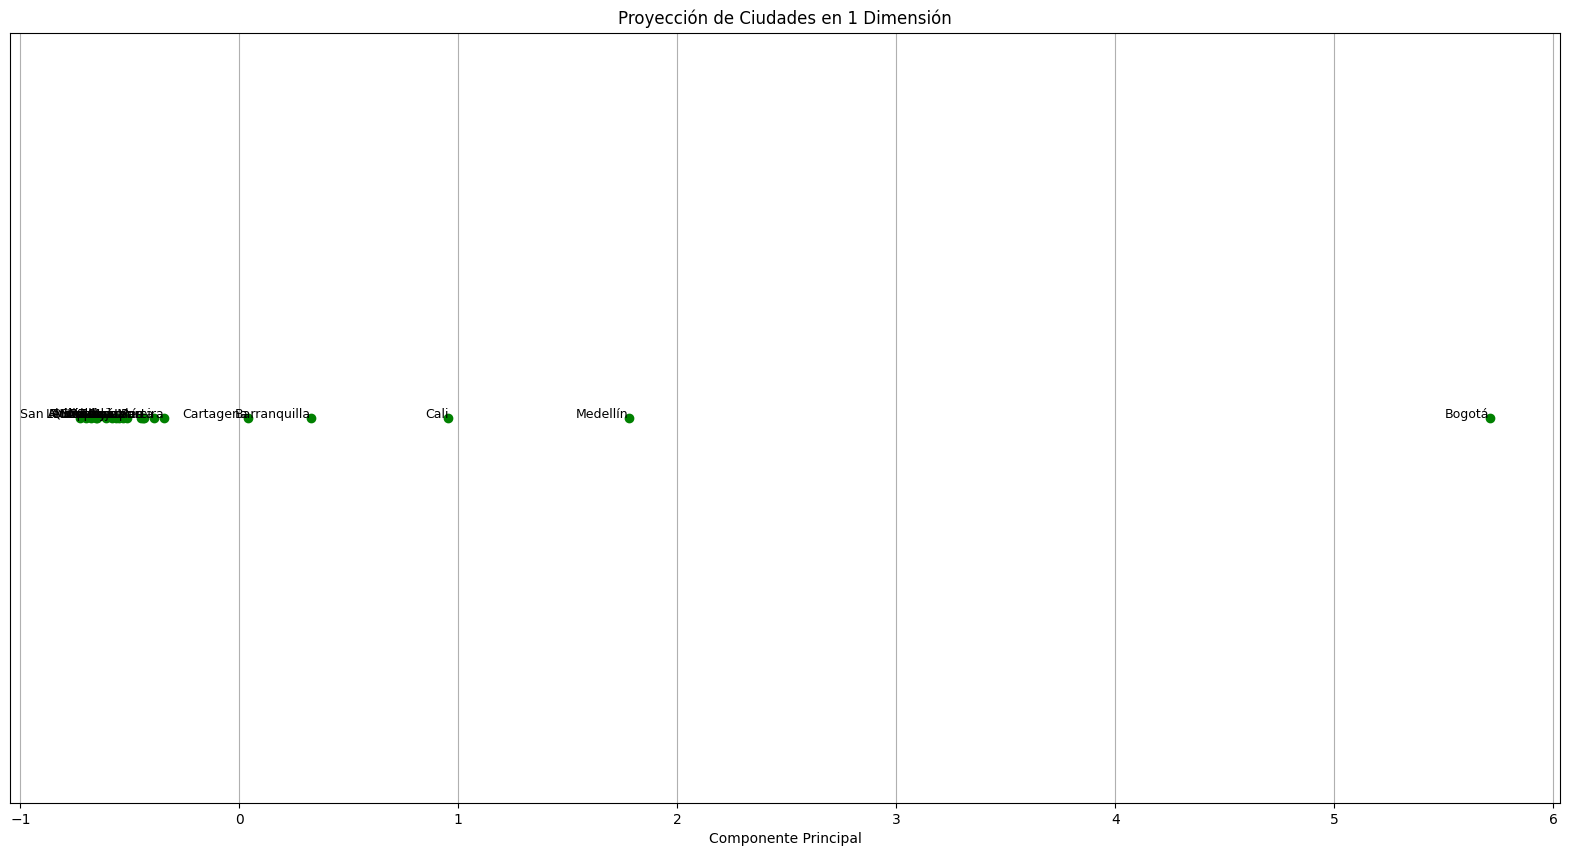

In [26]:
# Aseguramos que ambas listas tienen la misma longitud
ciudades = df['City'].tolist()

# Verifica si las longitudes coinciden
if len(ciudades) != len(datos_reducidos):
    print(f"Desajuste detectado: {len(ciudades)} ciudades y {len(datos_reducidos)} datos.")
    ciudades = ciudades[:len(datos_reducidos)]  # Trunca la lista de ciudades para que coincida

# Crear el gráfico
plt.figure(figsize=(20, 10))
plt.scatter(datos_reducidos, [0] * len(datos_reducidos), c='green', marker='o')

# Añadir etiquetas para cada ciudad
for i, ciudad in enumerate(ciudades):
    plt.text(datos_reducidos[i], 0, ciudad, fontsize=9, ha='right')

# Configuración del gráfico
plt.title('Proyección de Ciudades en 1 Dimensión')
plt.xlabel('Componente Principal')
plt.yticks([])  # Eliminar el eje y ya que estamos en una dimensión
plt.grid(True)
plt.show()


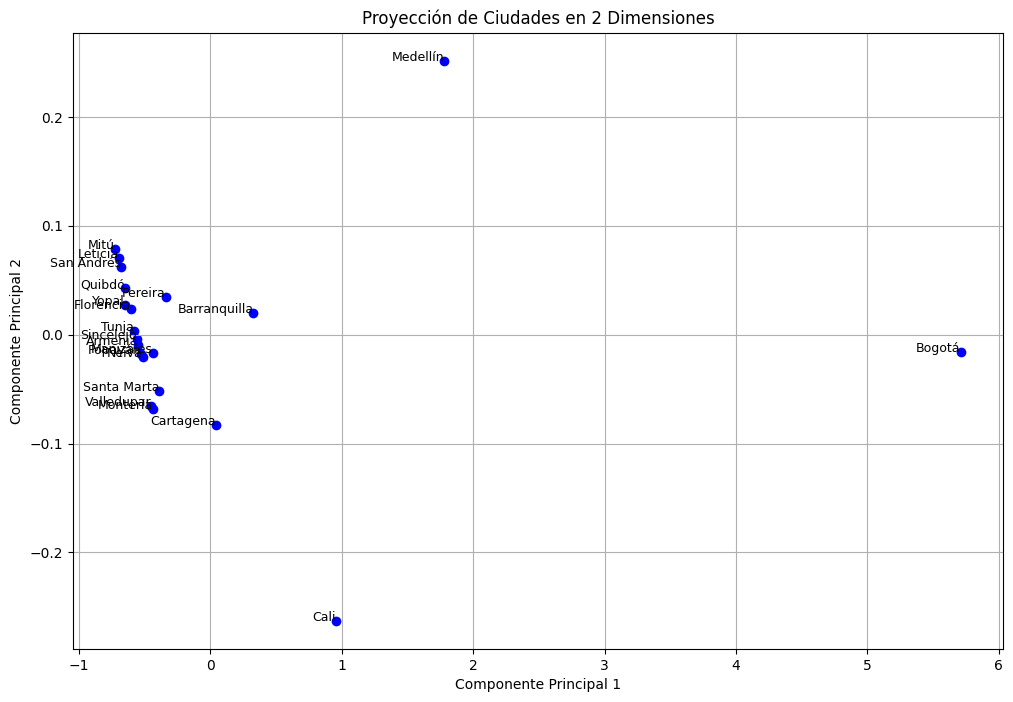

In [27]:
# Aplicar PCA para reducir a 2 dimensiones
pca = PCA(n_components=2)
datos_reducidos = pca.fit_transform(datos_normalizados)

# Crear el gráfico para visualizar las ciudades en 2 dimensiones
plt.figure(figsize=(12, 8))  # Aumenta el tamaño de la figura
plt.scatter(datos_reducidos[:, 0], datos_reducidos[:, 1], c='blue', marker='o')

# Añadir etiquetas para cada ciudad
for i, ciudad in enumerate(ciudades):
    plt.text(datos_reducidos[i, 0], datos_reducidos[i, 1], ciudad, fontsize=9, ha='right')

# Configuración del gráfico
plt.title('Proyección de Ciudades en 2 Dimensiones')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.grid(True)
plt.show()

**3Regression. Utiliza las variables GDP (USD Billion) y Population (Millions) para
crear una regresión. X es la población, y es el GDP.**

3.1 Calcular b0, b1 sin librerías.

In [ ]:

raw_cities = pd.read_csv("punto_1.csv")

x_values = []
y_values = []

for val in raw_cities["GDP (USD Billion)"]:
    y_values.append(val)

for val in raw_cities["Population (Millions)"]:
    x_values.append(val)

mean_x = 0
mean_y = 0

for val in y_values:
    mean_y += val/len(y_values)

for val in x_values:
    mean_x += val/len(x_values)

b0 = 0
b1 = 0
b1_num = 0
b1_den = 0

for _, row in raw_cities.iterrows():
    b1_num += (float(row["Population (Millions)"])-mean_x) * (float(row["GDP (USD Billion)"])-mean_y)
    b1_den += (float(row["Population (Millions)"])-mean_x) ** 2

b1 = b1_num / b1_den
b0 = mean_y - (b1 * mean_x)

print("B1 ->", b1)
print("B0 ->", b0)

3.2 Graficar la línea y los puntos


In [ ]:
y_pred = [b0 + b1 * xi for xi in x_values]

plt.figure(figsize=(14, 10))

plt.scatter(x_values, y_values, color='purple', label='City')
plt.plot(x_values, y_pred, color='green', label=f'Regression line: y = {b0:.3f} + {b1:.3f}x', linestyle="-")

# Asegúrate de tener la lista de nombres de ciudades
city_names = raw_cities["City"].tolist()

# Anotaciones en el gráfico
for i, city in enumerate(city_names):
    plt.annotate(city, (x_values[i], y_values[i]), textcoords="offset points", xytext=(0, 10), ha='center', fontsize=6)

plt.xlabel('Population (Millions)')
plt.ylabel('GDP (USD Billions)')
plt.title('Linear Regression')
plt.legend()
plt.show()


**4.  PCA**

Las siguientes caras son parte del dataset que se utilizara para aprender pca.

In [30]:
train_faces = [1855,4729,3954,2886,3168,4943,2288,2872,5059,2618,3365,1432,5092,4140,1600,4372,3157,2085,1264,
                4716,3533,3701,4524,1290,2415,2627,3391,2243,4988,5066,4386,2071,2875,2049,4944,4178,3953,2881,
                1638,1852,3739,4381,3998,2076,3396,2244,5061,2620,1899,1297,2412,3706,4523,1263,4711,3534,1607,
                4375,3150,2082,3362,1435,5095,4147,4986,5068,4388,2843,3991,2629,1890,4718,1864,4972,3965,3159,
                2616,2424,2040,3192,4185,5057,2272,2888,3166,1631,4343,1403,4171,2286,3354,4515,3730,3502,1255,
                4727,1609,3962,4975,4149,3708,1863,1897,1299,2844,3996,2078,3398,4981,3505,1252,4720,4512,3737,
                1404,4176,2281,3353,3161,1636,4344,4182,5050,2275,2047,3195,2423,2611,3763,4546,4774,3551,2483,
                4310,1662,3135,3909,3307,4122,1450,1696,2013,2221,3797,2645,4780,2477,4921,3338,3936,1239,1837,
                4579,2448,2810,5209,4787,2470,3790,2642,2226,5003,1691,2014,2828,3300,4125,4919,1457,4317,1665,
                3132,4773,3556,2484,3764,4541,2817,2219,1830,2689,3569,3931,4328,4926,1468,5035,1495,2210,2022,
                5207,2446,3594,4583,2674,3560,4745,1237,4577,1839,2680,3752,4113,1461,3336,3104,3938,4321,1653,
                3799,2479,1698,2821,3907,3309,4910,4548,1806,3103,4326,1654,4114,1466,4928,3331,4570,2687,3755,
                3567,4742,1230,4584,2673,2441,3593,2025,2819,5200,5032,1492,2217,3558,1801,1459,4917,4319,3900,
                2228,2826,4789,1298,1896,3399,4980,2079,2845,3997,4148,4974,1608,3963,3709,1862,2046,3194,4183,
                5051,2274,2610,2422,4513,3736,3504,4721,1253,3160,4345,1637,4177,1405,2280,3352,1865,4719,3158,
                3964,4973,4389,2842,3990,5069,4987,2628,1891,4170,1402,2287,3355,3167,2889,4342,1630,3503,4726,
                1254,4514,3731,2425,2617,4184,5056,2273,2041,3193,3952,2880,1639,4179,4945,1853,3738,2048,2874,
                4710,1262,3535,3707,4522,3363,5094,4146,1434,4374,1606,3151,2083,3397,2245,5060,4380,2077,3999,
                1296,2413,2621,1898,5058,2873,2619,4728,1854,4942,2289,3169,3955,2887,2626,1291,2414,4387,2070,
                3390,2242,5067,4989,4373,1601,3156,2084,3364,5093,4141,1433,3700,4525,4717,1265,3532,2440,3592,
                4585,2672,1493,5033,2216,2818,2024,5201,1467,4929,4115,3330,3102,1655,4327,3566,1231,4743,4571,
                2686,3754,2827,2229,4788,1800,3559,4318,3901,1458,4916,4576,1838,2681,3753,3561,1236,4744,3939,
                3105,1652,4320,1460,4112,3337,2023,5206,1494,5034,2211,4582,2675,2447,3595,3308,4911,3906,4549,
                1807,2478,3798,1699,2820,1664,4316,3133,3301,4918,1456,4124,3765,4540,4772,3557,2485,3791,2643,
                4786,2471,1690,2829,2015,2227,5002,3568,1831,2688,4927,1469,3930,4329,2218,2816,2220,5005,1697,
                2012,4781,2476,3796,2644,4775,3550,2482,3762,1809,4547,3306,1451,4123,1663,4311,3908,3134,2449,
                2811,5208,3937,4920,3339,1836,4578,1238,1944,4638,3079,2997,3845,4852,2399,2963,5148,2709,3274,
                4051,5183,1523,4263,1711,2194,3046,4607,1375,3422,3610,4435,1381,2504,2736,2352,3280,5177,4899,
                4297,2160,2158,2964,4069,4855,2990,3842,1729,1943,3628,4290,2167,3889,2355,3287,5170,2731,1988,
                1386,2503,3617,4432,4600,1372,3425,4264,1716,2193,3041,3273,5184,1524,5179,4897,4299,3880,2952,
                2738,1981,4609,1975,4863,3048,3874,2707,2535,3083,2151,5146,4094,2363,3077,2999,4252,1720,4060,
                1512,3245,2397,4404,3621,3413,4636,1344,1718,3873,4058,4864,3619,1972,1986,1388,2169,3887,2955,
                3289,4890,3414,4631,1343,4403,3626,4067,1515,3242,2390,3070,4255,1727,5141,4093,2364,3084,2156,
                2532,2700,3672,4457,1919,1317,4665,2592,3440,1773,4201,3818,3024,3216,1541,4033,1787,2102,2330,
                5115,2754,3686,4691,2566,4830,3229,3827,1328,4468,1926,2559,2901,4696,2561,2753,3681,2337,5112,
                1780,2939,2105,3211,1546,4808,4034,1774,4206,3023,1310,4662,2595,3447,3675,4450,2906,2308,1921,
                2798,3478,3820,4239,1579,4837,1584,5124,2301,2133,3485,2557,4492,2765,3471,1326,4654,1928,4466,
                3643,2791,1570,4002,3227,3829,3015,1742,4230,3688,2568,1789,2930,3816,3218,4801,1917,4459,1319,
                3012,1745,4237,4839,1577,4005,3220,4461,3644,2796,3476,1321,4653,4495,2762,3482,2550,2908,2134,
                1583,5123,2306,3449,1910,4806,1548,4208,3811,2339,2937,4698,1389,1987,3288,4891,3886,2954,2168,
                4865,4059,1719,3872,3618,1973,3085,2157,5140,4092,2365,2701,2533,4402,3627,3415,1342,4630,3071,
                1726,4254,1514,4066,3243,2391,1974,4608,3875,3049,4862,4298,3881,2953,4896,5178,2739,1980,1513,
                4061,3244,2396,2998,3076,1721,4253,3412,1345,4637,4405,3620,2534,2706,5147,4095,2362,3082,2150,
                2991,3843,1728,4854,4068,1942,3629,2965,2159,1373,4601,3424,3616,4433,3272,1525,4057,5185,1717,
                4265,2192,3040,2354,3286,5171,4291,3888,2166,1387,2502,2730,1989,5149,2962,2708,4639,1945,4853,
                2398,2996,3844,3078,2737,1380,2505,4296,2161,2353,3281,4898,5176,1710,4262,2195,3047,3275,1522,
                4050,5182,3611,4434,1374,4606,3423,3483,2551,4494,2763,5122,1582,2307,2135,2909,4004,4838,1576,
                3221,3013,4236,1744,3477,4652,1320,4460,3645,2797,2936,2338,4699,1911,3448,4209,3810,4807,1549,
                1929,4467,3642,2790,3470,4655,1327,3014,3828,4231,1743,4003,1571,3226,2132,5125,1585,2300,4493,
                2764,3484,2556,3219,4800,3817,1318,1916,4458,2569,3689,1788,2931,4207,1775,3022,3210,4035,1547,
                4809,3674,4451,4663,1311,2594,3446,2752,3680,4697,2560,1781,2104,2938,2336,5113,3479,1920,2799,
                1578,4836,3821,4238,2309,2907,2331,5114,1786,2103,4690,2567,2755,3687,4664,1316,2593,3441,3673,
                4456,1918,3217,4032,1540,4200,1772,3025,3819,2558,2900,3826,4831,3228,4469,1927,1329,5109,2922,
                2748,4679,1905,4813,3038,3804,2777,4480,3497,2545,2121,2313,5136,1596,4222,1750,3007,3235,4010,
                1562,3651,2783,4474,4646,1334,3463,3803,1768,4028,4814,1902,3669,2589,2119,2925,4641,1333,3464,
                3656,2784,4473,3232,4017,1565,4225,1757,3000,2314,5131,1591,2126,3490,2542,2770,4487,1934,4648,
                3009,3835,4822,2913,5138,1598,2779,3499,4021,1553,3204,3036,4213,1761,2580,3452,4677,1305,4445,
                3660,2574,4683,2746,3694,5107,2322,2110,1795,4489,2128,2914,4019,4825,1759,3832,3658,1933,2117,
                1792,5100,2325,2741,3693,2573,4684,4442,3667,2587,3455,4670,1302,3031,4214,1766,4026,1554,3203,
                2371,5154,4086,3091,2143,2527,2715,1356,4624,3401,3633,4416,1958,3257,2385,1500,4072,1732,4240,
                3859,3065,1993,2518,3892,2940,4885,3866,2188,4871,3268,4429,1967,1369,1735,4247,3062,3250,2382,
                1507,4849,4075,3634,4411,1351,4623,3406,2712,2520,2978,3096,2144,2376,5153,4081,3439,1960,1538,
                4876,5198,3861,4278,4882,2349,3895,2947,1994,1969,4427,3602,3430,1367,4615,3868,2186,3054,1703,
                4271,1531,4043,5191,3266,2172,4285,5165,2340,3292,2724,2516,1393,3259,4840,2985,3857,1358,1956,
                4418,2529,4088,2971,2511,1394,2723,5162,2347,3295,2949,2175,4282,4878,1536,4044,5196,3261,2181,
                3053,1704,4276,3437,1360,4612,4420,3605,2976,3098,2378,1951,3408,4249,2982,3850,4847,1509,1758,
                3833,4824,4018,3659,1932,4488,2915,2129,2586,3454,1303,4671,4443,3666,1555,4027,3202,3030,1767,
                4215,5101,2324,2116,1793,2572,4685,2740,3692,1599,5139,2912,3498,2778,4649,1935,4823,3834,3008,
                2747,3695,2575,4682,2111,1794,5106,2323]

test_faces = [3037,1760,4212,1552,4020,3205,4444,3661,2581,3453,1304,4676,2924,2118,4815,4029,3802,1769,2588,
              1903,3668,2127,2315,1590,5130,2771,4486,3491,2543,3657,2785,4472,1332,4640,3465,1756,4224,3001,3233,
              1564,4016,1904,4678,3805,3039,4812,2923,5108,2749,3234,1563,4011,1751,4223,3006,1335,4647,3462,3650,
              2782,4475,3496,2544,2776,4481,2312,1597,5137,2120,2180,3052,4277,1705,4045,5197,4879,1537,3260,4421,
              3604,3436,4613,1361,2722,2510,1395,2174,2948,4283,5163,2346,3294,3409,1950,4846,1508,4248,2983,3851,
              2379,3099,2977,5164,2341,3293,2173,4284,2517,1392,2725,3431,4614,1366,1968,4426,3603,4042,5190,1530,
              3267,2187,3055,3869,4270,1702,2528,2970,4089,2984,3856,3258,4841,1957,4419,1359,2521,2713,2377,5152,
              4080,3097,2145,2979,3251,2383,4074,1506,4848,4246,1734,3063,4622,1350,3407,3635,4410,3894,2946,4883,
              2348,1995,1961,3438,3860,4279,5199,1539,4877,3632,4417,1959,4625,1357,3400,4241,1733,3064,3858,3256,
              2384,4073,1501,3090,2142,2370,5155,4087,2714,2526,4870,3269,2189,3867,1368,4428,1966,2519,1992,4884,
              3893,2941,5018,2833,2659,4768,1814,4902,3915,3129,2666,4591,2454,3586,5215,2030,2202,1487,5027,1641,
              4333,3116,3324,1473,4101,2692,3740,4565,1225,4757,3572,3912,1679,4905,4139,1813,3778,2498,2834,2008,
              4750,3575,2695,3747,4562,3323,1474,4106,1646,4334,3111,2205,1480,5020,5212,2037,2453,3581,2661,4596,
              1825,4759,3924,3118,4933,2802,1489,5029,2668,3588,1442,4130,3315,3127,1670,4302,3543,2491,4766,4554,
              3771,2465,4792,3785,2657,5016,2233,2001,1684,4598,2805,2039,4934,4108,1648,3923,3749,1822,2006,1683,
              5011]


4.1 Calcular la mean face. Que es la cara con el promedio de los pixeles y visualizarla.

(<Figure size 640x480 with 1 Axes>, <Axes: title={'center': 'Mean face'}>)

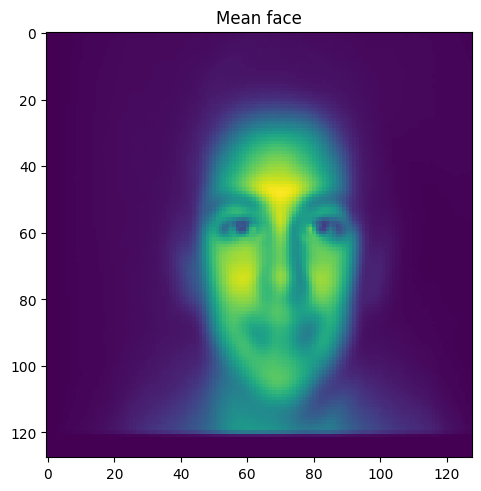

In [31]:
def load_images(faces):
    X = []

    for face in faces:
        with open(os.path.join("faces",str(face)), "rb") as f:
            bytes_read = f.read()
            img = Image.frombytes('L', (128,128), bytes_read)
            X.append(np.array(img).flatten())

    return np.array(X)

def plot_image(data, label="Mean face", ax=None):
    fn_shape = lambda X: X.reshape(128,128)
    fig = None
    if ax is None:
        fig, ax = plt.subplots(1,1, constrained_layout=True)
    ax.imshow(fn_shape(data))
    ax.set_title(label=label)
    return fig,ax

Tr = load_images(train_faces)

Tr_mean = np.mean(Tr, axis=0)
Tr_center = Tr - Tr_mean

plot_image(Tr_mean)

2. Centrar los datos, utilizar PCA. ¿Cuántos componentes se deben utilizar
para mantener el 95% de las características?. Crear una tabla para
mostrar las primeras 5 caras utilizando, la mean face + los datos
reconstruidos utilizando la primera componente, después con 3
componentes, después con las primeras 20 componentes, después con
las componentes que explican el 95% de la varianza y por último con el
numero de componentes que tiene el 99% de la varianza. ¿Qué se puede
concluir de los resultados?


In [32]:
from sklearn.decomposition import PCA

Tr_mean = np.mean(Tr, axis=0)
Tr_centered = Tr - Tr_mean
pca = PCA()
pca.fit(Tr_centered)

explained_variance = np.cumsum(pca.explained_variance_ratio_)


n_components_95 = np.argmax(explained_variance >= 0.95) + 1
n_components_99 = np.argmax(explained_variance >= 0.99) + 1

print(f"Componentes para 95% de varianza: {n_components_95}")
print(f"Componentes para 99% de varianza: {n_components_99}")

Componentes para 95% de varianza: 155
Componentes para 99% de varianza: 465


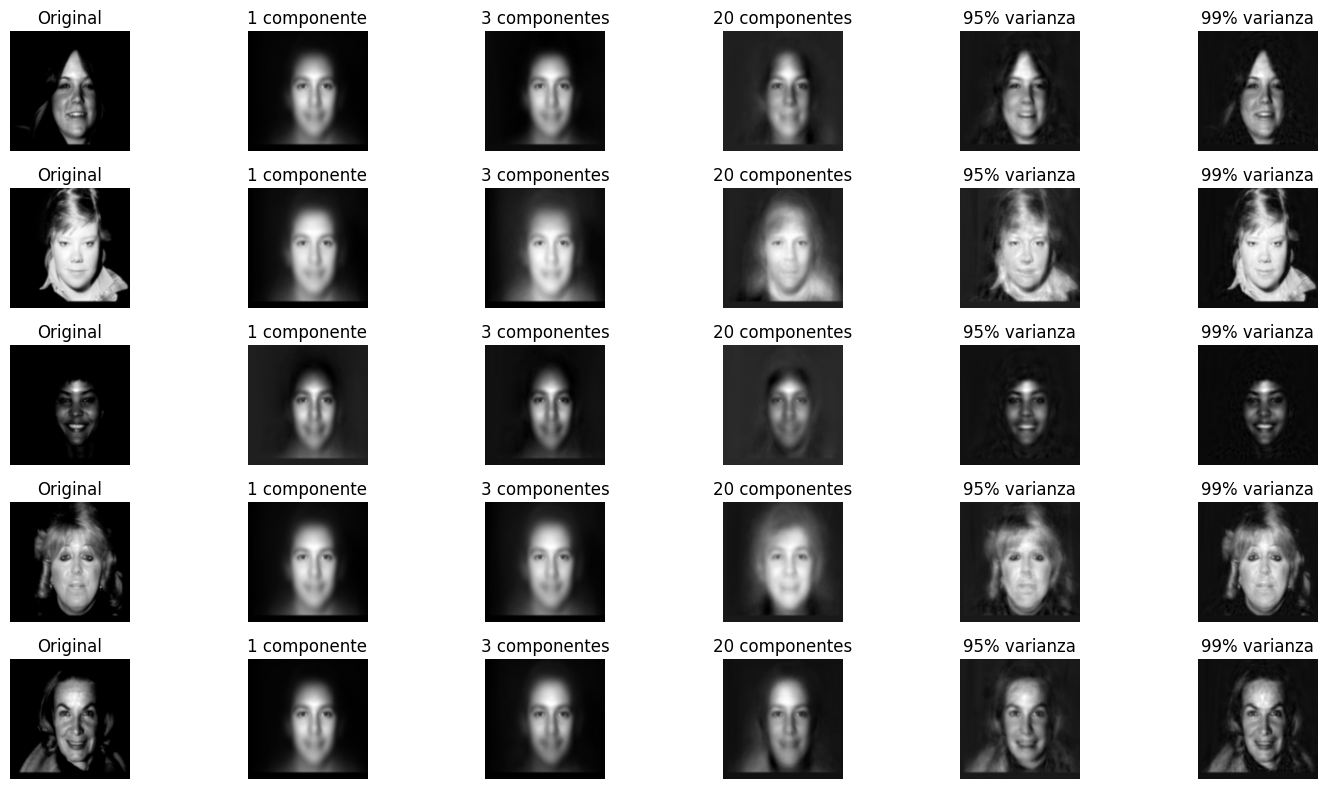

In [33]:

def reconstruct_faces(pca, data, mean, n_components):
    pca_n = PCA(n_components=n_components)
    data_transformed = pca_n.fit_transform(data)
    reconstructed = pca_n.inverse_transform(data_transformed) + mean
    return reconstructed

# Casos específicos:
reconstructions = {
    "1 componente": reconstruct_faces(pca, Tr_centered, Tr_mean, 1),
    "3 componentes": reconstruct_faces(pca, Tr_centered, Tr_mean, 3),
    "20 componentes": reconstruct_faces(pca, Tr_centered, Tr_mean, 20),
    "95% varianza": reconstruct_faces(pca, Tr_centered, Tr_mean, n_components_95),
    "99% varianza": reconstruct_faces(pca, Tr_centered, Tr_mean, n_components_99)
}

# Mostrar las primeras 5 caras con las distintas reconstrucciones
fig, axes = plt.subplots(5, len(reconstructions) + 1, figsize=(15, 8))

for i in range(5):
    axes[i, 0].imshow(Tr[i].reshape(128, 128), cmap='gray')
    axes[i, 0].set_title("Original")
    axes[i, 0].axis("off")
    for j, (label, rec) in enumerate(reconstructions.items()):
        axes[i, j + 1].imshow(rec[i].reshape(128, 128), cmap='gray')
        axes[i, j + 1].set_title(label)
        axes[i, j + 1].axis("off")

plt.tight_layout()
plt.show()

**Conclusion** a medida que aumentan los componentes la imagen mejora con el 95% de la varianza suele ser suficiente para reconstruir la cara nitidamente y con el 99% es casi una reconstruccion perfecta

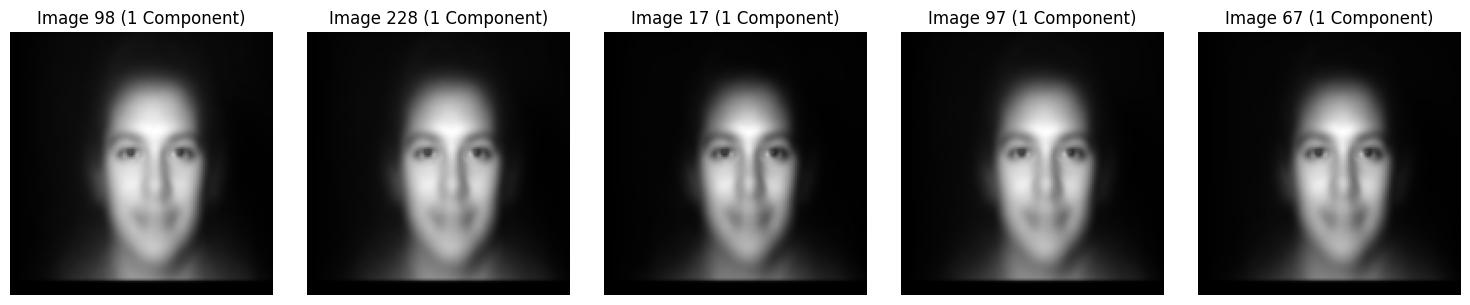

Output written to faces_465.csv


In [34]:
Te = load_images(test_faces)
Te_center = Te - Tr_mean


Te_proj = np.dot(Te_center, pca.components_.T)
first_comps = Te_proj[:, 0]


def reconstruct_faces(pca_model, data, mean, n_components):
    """ Reconstruye las imágenes usando n componentes principales """
    data_transformed = pca_model.transform(data)
    reconstructed = np.dot(data_transformed[:, :n_components], pca_model.components_[:n_components, :])
    return reconstructed + mean


rebuilt_faces = reconstruct_faces(pca, Te_center, Tr_mean, 1)

fig, ax = plt.subplots(1, 5, figsize=(15, 3))

for i in range(5):
    r = random.randint(0, len(test_faces) - 1)
    ax[i].imshow(rebuilt_faces[r].reshape(128, 128), cmap='gray')
    ax[i].set_title(f"Image {r+1} (1 Component)")
    ax[i].axis('off')

plt.tight_layout()
plt.show()


output = pd.DataFrame({
    'id': test_faces,
    'label': first_comps
})

output.to_csv('faces_465.csv', index=False)
print("Output written to faces_465.csv")

5. Utilizando el dataset del amazon data/amazon_products.csv crear: Utilizar la
librería de plotly.


5.1. Distribución de cada variables:

5.1.1. Para las variables categóricas un gráfico de barras. Categoría numero de observaciones.


In [6]:
import re
import plotly.express as px

products = pd.read_csv('amazon_product.csv')

numeric = ["product_price","product_original_price","product_star_rating","product_num_ratings","product_num_offers","product_minimum_offer_price","sales_volume","unit_price","unit_count"]
categorical = ["currency","is_best_seller","is_amazon_choice","is_prime","climate_pledge_friendly","has_variations"]
useless = ["asin","product_title","product_url","product_photo","delivery","product_availability"]

def sanitize_sales_volume(value):
    match = re.search(r'(\d+)(K?)\+', str(value))

    if match:
        num = int(match.group(1))
        if match.group(2) == "K":
            num *= 1000
        return num
    return 0

# Sanitize values
products["sales_volume"] = products["sales_volume"].apply(sanitize_sales_volume)
for col in numeric:
    products[col] = pd.to_numeric(products[col].astype(str).str.replace(r'[^\d.]', '', regex=True), errors='coerce').fillna(0)

In [ ]:
for col in categorical:
    n = products[col].value_counts().reset_index()
    n.columns = [col, 'Observations']
    fig = px.bar(n, x=col, y='Observations', title=f'Observations in {col}')
    fig.update_traces(marker_color='blue')
    fig.show()

5.1.2. Para las variables numéricas crear histogramas. Listar los productos que están más lejos de 5 estándares de desviación, y serían considerados outliers. Hacer test de si es una distribución normal o no.

In [ ]:
for col in numeric:
    fig = px.histogram(products, x=col, title=f"Histogram of {col}", nbins=30)
    fig.update_traces(marker_color='blue')
    fig.show()

In [38]:
outliers = {}

for col in numeric:
    mean = products[col].mean()
    std_dev = products[col].std()

    # Outlier: value > mean ± stdv*5
    threshold_low = mean - 5 * std_dev
    threshold_high = mean + 5 * std_dev
    outlier_rows = products[(products[col] < threshold_low) | (products[col] > threshold_high)]

    if not outlier_rows.empty:
        outliers[col] = outlier_rows[["asin", col]]

for col, out in outliers.items():
    print(f"Outliers found in {col}:")
    print(out)
    print("\n" + "-"*50 + "\n")

Outliers found in product_original_price:
          asin  product_original_price
13  B0CGTD5KVT                   699.0

--------------------------------------------------

Outliers found in product_num_ratings:
          asin  product_num_ratings
55  B07Y8SJGCV              1015448

--------------------------------------------------

Outliers found in sales_volume:
          asin  sales_volume
29  B0D5FZGY8W        100000

--------------------------------------------------

Outliers found in unit_price:
          asin  unit_price
25  B0CS12LZLS        1.91
37  B0CV4FQPY1        2.05

--------------------------------------------------

Outliers found in unit_count:
          asin  unit_count
29  B0D5FZGY8W        60.0

--------------------------------------------------



In [39]:
print("Shapiro-Wilk test for normality:\n")
for col in numeric:
    stat, p_value = stats.shapiro(products[col])
    print(f"{col}: W={stat:.4f}, p={p_value:.4f}")

    if p_value < 0.05:
        print("  -> Not normal\n")
    else:
        print("  -> Normal\n")

Shapiro-Wilk test for normality:

product_price: W=0.6241, p=0.0000
  -> Not normal

product_original_price: W=0.5015, p=0.0000
  -> Not normal

product_star_rating: W=0.6529, p=0.0000
  -> Not normal

product_num_ratings: W=0.3746, p=0.0000
  -> Not normal

product_num_offers: W=0.5428, p=0.0000
  -> Not normal

product_minimum_offer_price: W=0.6508, p=0.0000
  -> Not normal

sales_volume: W=0.4319, p=0.0000
  -> Not normal

unit_price: W=0.2447, p=0.0000
  -> Not normal

unit_count: W=0.1460, p=0.0000
  -> Not normal



5.2. Gráfico de la relación de cada variable con respecto al sales_volume (convertir a numero):

5.2.1. Variables categóricas debes crear un boxplot. Explique cómo interpreta el gráfico

In [ ]:
for col in categorical:
    fig = px.box(products, x=col, y='sales_volume',title=f'sales_volume by {col}',labels={col: col, 'sales_volume': 'sales_volume'})
    fig.update_traces(marker=dict(color='blue'))
    fig.show()

5.2.2. Variables numéricas vas a crear un scatter plot.Explique cómo interpreta el gráfico

In [ ]:
for col in numeric:
    if col != 'sales_volume':
        fig = px.scatter(products, x=col, y='sales_volume',title=f'{col} vs sales_volume',labels={col: col, 'sales_volume': 'sales_volume'})
        fig.update_traces(marker=dict(color='blue'))
        fig.show()

5.3. Matriz de correlación.

5.3.1. Cree la matriz de correlación, cuales son las variables más importantes para explicar la variabilidad de las sales_volume. Explique por qué el coeficiente es negativo o positivo.

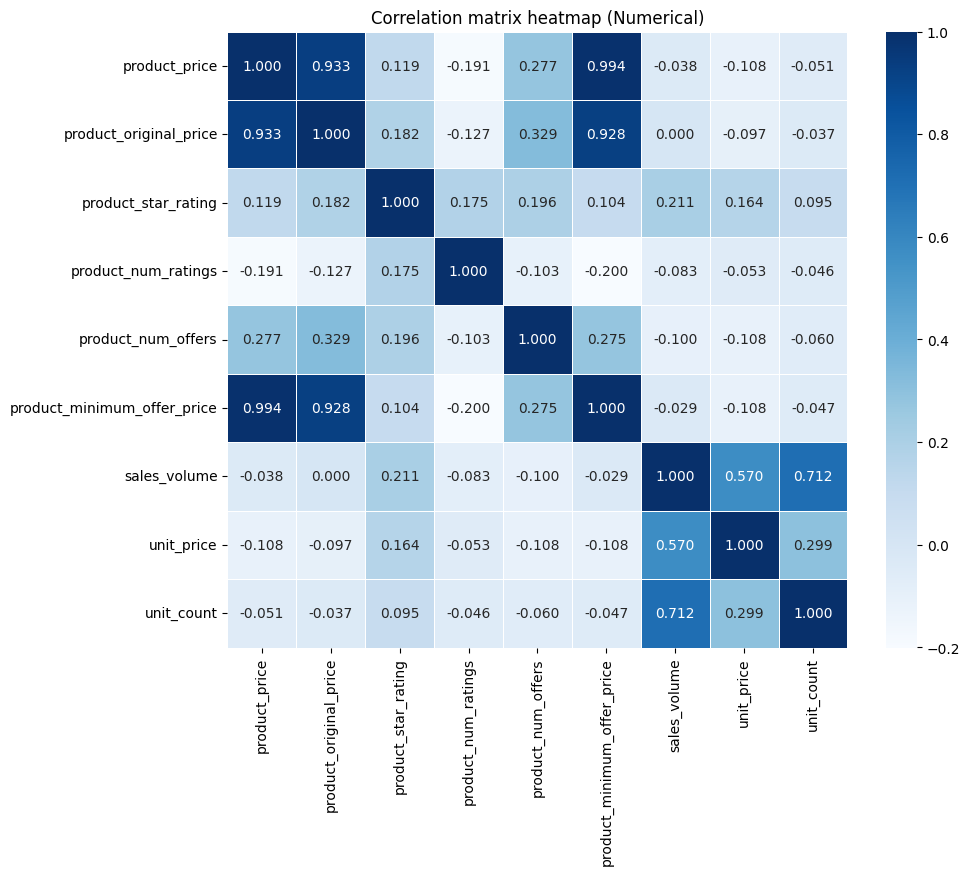

In [42]:
corr = products[numeric].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".3f", linewidths=0.5 , cmap="Blues")
plt.title("Correlation matrix heatmap (Numerical)")
plt.show()

Si una variable tuviera una correlación negativa significativa, como product_price, indicaría que a mayor precio, menor volumen de ventas, lo que sería típico en productos sensibles al precio.                                                                                              Las variables más importantes para explicar el volumen de ventas (sales_volume) son unit_count (0.712), unit_price (0.570) y product_star_rating (0.211). Esto significa que los productos vendidos en paquetes más grandes, con un precio más alto (posiblemente percibidos como de mejor calidad) y con buenas calificaciones tienden a vender más. Los coeficientes positivos indican que cuando estas variables suben, las ventas también tienden a subir.

5.3.2. Cree las dummy variables para todas las variables categóricas y genere la matriz de correlación nuevamente. ¿Cuál es el valor de variable categórica con mayor correlación?

<Axes: >

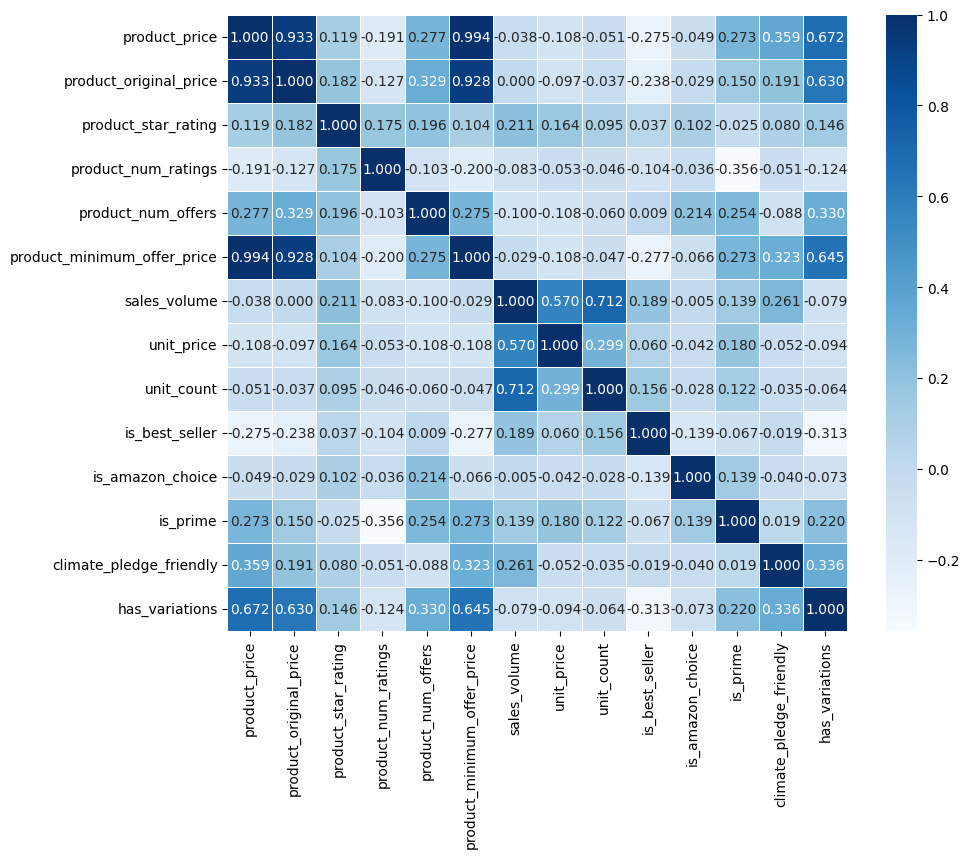

In [43]:
dummies = pd.get_dummies(products[categorical].drop(columns=["currency"]))
corr = pd.concat([products[numeric], dummies], axis=1).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".3f", linewidths=0.5, cmap="Blues")


la variable categórica con mayor correlación es "has_variations" con "product_price" (0.672).Esto indica que los productos que tienen variaciones (como colores o tamaños diferentes) tienden a tener precios más altos. Esto podría deberse a que los productos más personalizables suelen ser más completos o atractivos para los consumidores, lo que justifica un precio mayor.

5.3.3. Utilizar python para imputar los valores nulos con la media. Después dividir los datos en train y test. Por ultimo hacer una regresión entre x que es product_num_ratings y product_star_rating qué es la calificación. Cual es el coeficiente b1 y b0. Describir resultados.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import plotly.graph_objects as go



X = products[["product_num_ratings"]]
Y = products["product_star_rating"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)

b0 = model.intercept_
b1 = model.coef_[0]

print(f"B1: {b1}")
print(f"B0: {b0}")


fig = go.Figure()

fig.add_trace(go.Scatter(
    x=X_test["product_num_ratings"],
    y=Y_test,
    mode='markers',
    name='Product',
    marker=dict(color='green', size=8)
))

fig.add_trace(go.Scatter(
    x=X_test["product_num_ratings"],
    y=Y_pred,
    mode='lines',
    name='Regression Line',
    line=dict(color='blue', width=2)
))

fig.update_layout(
    title="Linear Regression: product_star_rating vs. product_num_ratings",
    xaxis_title="product_num_ratings",
    yaxis_title="product_star_rating",
    showlegend=True
)

fig.show()

El analisis muestra que existe una ligera relacion entre la cantidad de reseñas de un producto y su calificacion promedio sin embargo al estar la pendiente no tan inclinada indica que el numero de reseñas no es el factor mas determinante para la calificacion final , tambien se puede apreciar que la mayoria de los productos tienen pocas reseñas, el intercepto inicia desde un (3.51) lo que indica que un producto sin reseñas tendria una calificacion estimada de 3.5 estrellas